<a href="https://colab.research.google.com/github/tayabba-19/Mini-Project-5-Mental-Health-Survey/blob/main/Mini_Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediciting Depression from Mental Health Survey Data using Deep Learning**

***Tayabba Zabeen***

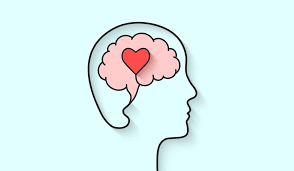


**About Dataset**
This dataset compiles a wide range of information aimed at understanding, analyzing, and predicting depression levels among person. It is designed for research in psychology, data science, and education, providing insights into factors that contribute to person mental health challenges and aiding in the design of early intervention strategies

**Data Description**


**Format**:
CSV (each row represents an individual person)

**Features**:

**ID**: Unique identifier for each person

**Demographics**: Age, Gender, City

**Academic Indicators**: CGPA, Academic Pressure, Study Satisfaction

**Lifestyle & Wellbeing**: Sleep Duration, Dietary Habits, Work Pressure, Job Satisfaction, Work/Study Hours

**Additional Factors**: Profession, Degree, Financial Stress, Family History of Mental Illness, and whether the person has ever had suicidal thoughts

**Depression_Status**: A binary indicator (0/1 or Yes/No) that denotes whether a person is experiencing depression

In [ ]:
import pandas as pd

df = pd.read_csv("mental health survey.csv")
df


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2,4.0,Yes,1
140696,140696,Lata,Female,41,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6,5.0,Yes,0
140697,140697,Aanchal,Female,24,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4,4.0,No,0
140698,140698,Prachi,Female,49,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10,1.0,No,0


**Which cities were the sources of the collected data?**

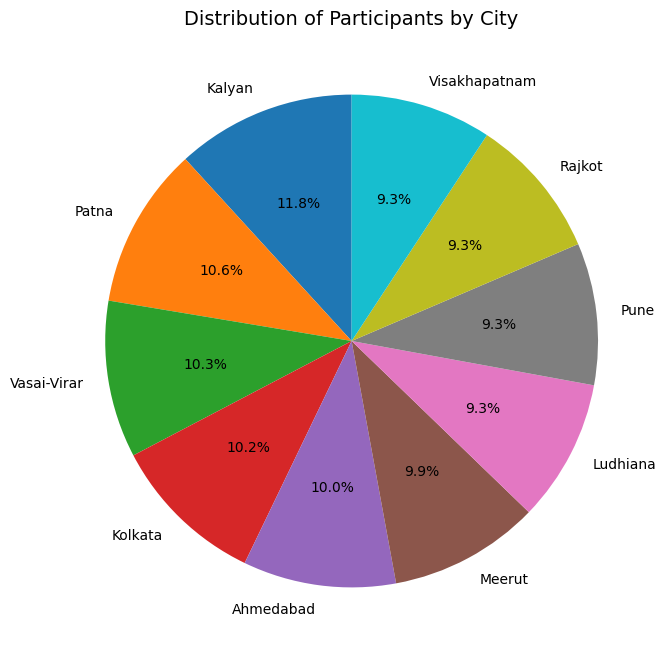

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load CSV
df = pd.read_csv('/content/mental health survey.csv')
df.columns = df.columns.str.strip()

# 2️⃣ Count participants per city
counts = df['City'].value_counts()

# 3️⃣ Optional: Top 10 cities for clarity
counts = counts.head(10)  # agar bahut saari cities hain

# 4️⃣ Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Participants by City', fontsize=14)
plt.show()


**Data Segmentation for Deeper Insights**

For clearer insights, this dataset has been thoughtfully divided into two distinct categories:

1) ***Depressed Person*** — Person who reported experiencing some form of depression when asked about their mental health. **Depressed person is indicate 1**

2) ***Not Depressed Person*** — Person who reported feeling positive about their mental well-being. **Not Depressed person indicate 0** .

This categorization helps to better understand patterns, behaviors, and risk factors associated with student mental health.

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# 1️⃣ CSV load
df = pd.read_csv('/content/mental health survey.csv')

# 2️⃣ Status column
df['Status'] = df['Depression'].map({1:'Depressed', 0:'Not Depressed'}).fillna('Unknown')

# 3️⃣ Generate HTML table manually
def generate_html_table(df, max_rows=50):
    html = '<div style="overflow-x:auto; max-width:100%"><table border="1" style="border-collapse:collapse; width:100%;">'

    # Header
    html += '<tr>'
    for col in df.columns:
        html += f'<th style="padding:5px; text-align:center; background-color:#f0f0f0;">{col}</th>'
    html += '</tr>'

    # Rows (limit to max_rows for preview)
    for i, row in df.head(max_rows).iterrows():
        html += '<tr>'
        for col in df.columns:
            cell = row[col]
            if col == 'Status':
                if cell == 'Depressed':
                    html += f'<td style="background-color:red; color:white; font-weight:bold; text-align:center;">{cell}</td>'
                elif cell == 'Not Depressed':
                    html += f'<td style="background-color:green; color:white; font-weight:bold; text-align:center;">{cell}</td>'
                else:
                    html += f'<td>{cell}</td>'
            else:
                html += f'<td style="padding:5px; text-align:center;">{cell}</td>'
        html += '</tr>'

    html += '</table></div>'
    return html

# 4️⃣ Display preview
display(HTML('<h3>Mental Health Survey Preview (First 50 rows)</h3>'))
display(HTML(generate_html_table(df)))


id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Status
0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,nan,5.0,nan,nan,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0,Not Depressed
1,Vivan,Male,26,Varanasi,Working Professional,Teacher,nan,4.0,nan,nan,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1,Depressed
2,Yuvraj,Male,33,Visakhapatnam,Student,nan,5.0,nan,8.97,2.0,nan,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1,Depressed
3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,nan,5.0,nan,nan,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1,Depressed
4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,nan,1.0,nan,nan,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0,Not Depressed
5,Vani,Female,59,Ahmedabad,Working Professional,Finanancial Analyst,nan,2.0,nan,nan,5.0,5-6 hours,Healthy,MCA,No,7,5.0,No,0,Not Depressed
6,Ritvik,Male,47,Thane,Working Professional,Chemist,nan,5.0,nan,nan,2.0,7-8 hours,Moderate,MD,No,6,2.0,No,0,Not Depressed
7,Rajveer,Male,38,Nashik,Working Professional,Teacher,nan,3.0,nan,nan,4.0,7-8 hours,Unhealthy,B.Pharm,No,10,3.0,Yes,0,Not Depressed
8,Aishwarya,Female,24,Bangalore,Student,nan,2.0,nan,5.9,5.0,nan,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0,Not Depressed
9,Simran,Female,42,Patna,Working Professional,Electrician,nan,4.0,nan,nan,1.0,5-6 hours,Healthy,ME,Yes,7,2.0,Yes,0,Not Depressed


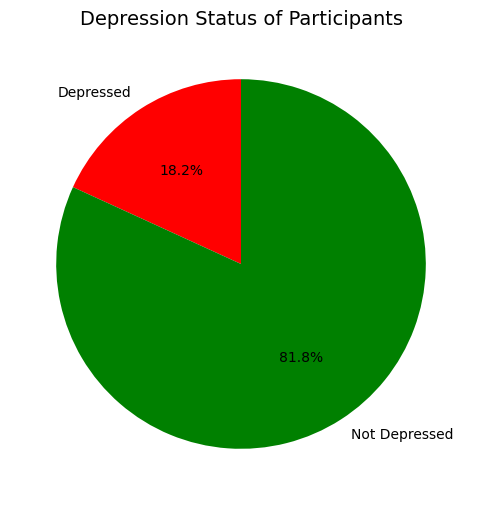

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/content/mental health survey.csv')
df.columns = df.columns.str.strip()

# Column
col = 'Depression'  # tumhare CSV me jo column hai

# Count 1 and 0
counts = df[col].value_counts()

# Rename index for clarity
counts.index = counts.index.map({1: 'Depressed', 0: 'Not Depressed'})

# Force order: Depressed first, Not Depressed second
counts = counts.reindex(['Depressed', 'Not Depressed'])

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['red', 'green']  # Depressed = Red, Not Depressed = Green
)
plt.title('Depression Status of Participants', fontsize=14)
plt.show()


**Why Are So Many Person Feeling Depressed?**

Let’s compare not depressed and depressed person across multiple aspects such as sleep, study hours, diet, academic pressure

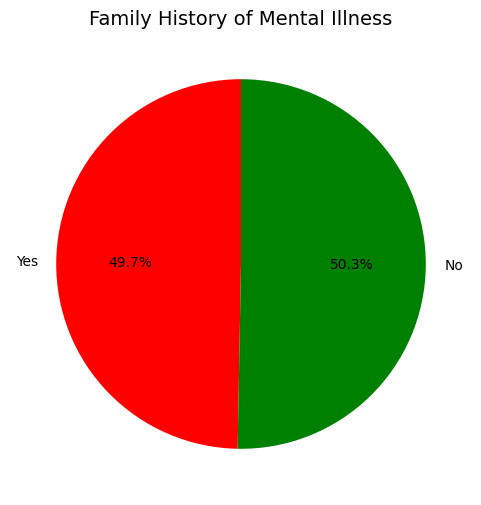

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load CSV
df = pd.read_csv('/content/mental health survey.csv')
df.columns = df.columns.str.strip()  # Remove extra spaces

# 2️⃣ Count Yes / No
counts = df['Family History of Mental Illness'].value_counts()

# 3️⃣ Force correct order: Yes first (risk), No second
counts = counts.reindex(['Yes', 'No'])

# 4️⃣ Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',          # Show percentage
    startangle=90,
    colors=['red', 'green']      # Yes = Red (risk), No = Green (no risk)
)
plt.title('Family History of Mental Illness', fontsize=14)
plt.show()


This pie chart represent the distribution of participants based on whether they have a **family history of mental illness**.

The data is divided into **two categories:**


*   **Yes** - Around 49.7% of participants reported **Yes**,meaning they have a family history of mental illness.
*   **No** - Around 50.3% of participants reported **No**, meaning they do not have a family history of mental illness.

The distribution is **almost equal**, showing that family history is present in nearly half of the participants.

This pie chart shows that nearly half of the participants have a family history of mental illness,which is an important factor in mental health analysis.



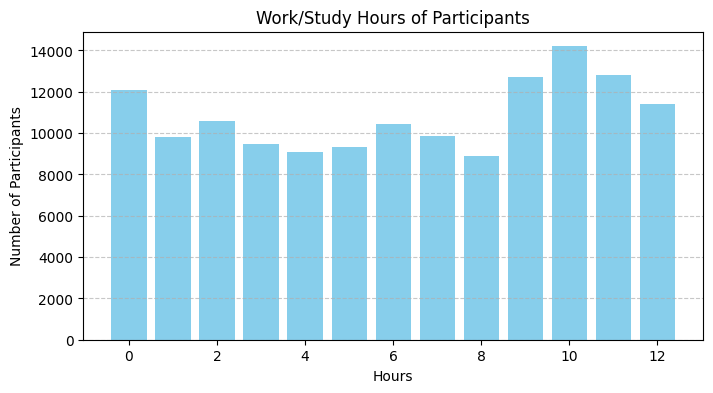

In [ ]:
import matplotlib.pyplot as plt

# Count frequency of each category
hours_counts = df['Work/Study Hours'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(8,4))
plt.bar(hours_counts.index, hours_counts.values, color='skyblue')
plt.title('Work/Study Hours of Participants')
plt.xlabel('Hours')
plt.ylabel('Number of Participants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This bar chart shows the **distribution of participants based on daily work or study hours**

**X-axis:** Number of work/study ours (0 to 12 hours)

**Y-axis:** Number of participants

Each bar represents **how many participants fall into a specific hour category.**

A higher number of participants fall in the range of **8 to 10 hours**, indicating that most people spend a full working or study day.

Fewer particiapnts are observes at very low hours **(0-2)**, suggesting fewer people are completely inactive.


Work or Study hours act as an important features in prediciting mental health conditions, as **excessive workload may increase stress and depression risk.**

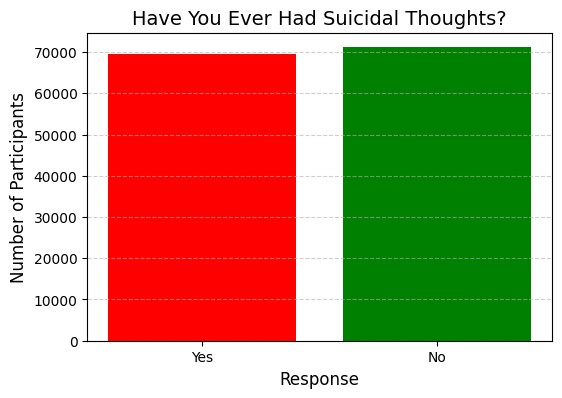

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/content/mental health survey.csv')

# Remove extra spaces
df.columns = df.columns.str.strip()

col = 'Have you ever had suicidal thoughts ?'

# Count values
counts = df[col].value_counts()

# Reorder explicitly: Yes first, No second
counts = counts.reindex(['Yes', 'No'])

# Bar Graph
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=['red', 'green'])

plt.title('Have You Ever Had Suicidal Thoughts?', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


This bar chart represent Have you ever had suicidal thoughts

**X-axis:** Response category (Yes, No)

**Y-axis:** Number of participants

Each bar shows the count of participants for each response.

**Yes** indicate they have experienced suicidal thoughts.

**No** indicate they have not experienced such thoughts.

This indicates that suicidal thoughts are present in a considerable portion of the population, which is a serious mental health concern.




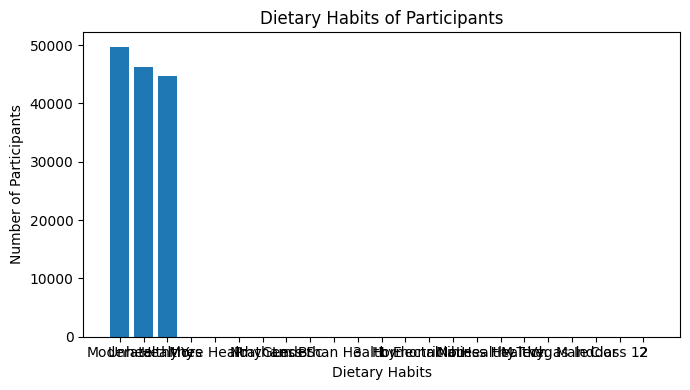

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/content/mental health survey.csv')
df.columns = df.columns.str.strip()

# Column
col = 'Dietary Habits'
counts = df[col].value_counts()

# Create fresh figure
fig, ax = plt.subplots(figsize=(7,4))

ax.bar(range(len(counts)), counts.values)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.index)

ax.set_xlabel('Dietary Habits')
ax.set_ylabel('Number of Participants')
ax.set_title('Dietary Habits of Participants')

plt.tight_layout()
plt.show()


This bar chart shows the distribution of participants based on their dietary habits.

The **X-axis** represent different dietary habits such as healthy,moderate,unhealthy etc.

The **Y-axis** represent the number of participants.
Each bar indicates how many participants follow a particular type of diet.

A **healthy diet** help to improve the mood, concentration and reduces  the stress.

An **unhealthy diet** may lead to fatigue, mood swings and a higher risk of mental health problems.

**Dietary habits** are also considered in mental health analysis, as poor eating habits can increase the risk of depression  and anxiety.




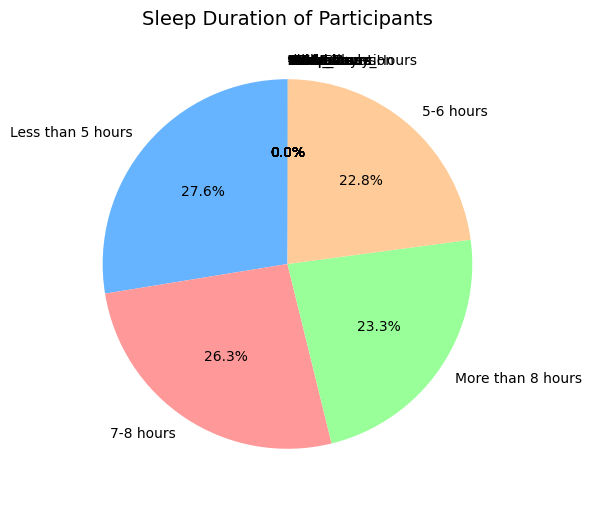

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ CSV load
df = pd.read_csv('/content/mental health survey.csv')
df.columns = df.columns.str.strip()  # Extra spaces remove

# 2️⃣ Count frequency of each sleep duration
counts = df['Sleep Duration'].value_counts()

# 3️⃣ Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',       # Percentage display
    startangle=90,
    colors=['#66b3ff','#ff9999','#99ff99','#ffcc99']  # Optional custom colors
)
plt.title('Sleep Duration of Participants', fontsize=14)
plt.show()


This pie chart represents the percentage distribution of participants based on their sleep duration.
The categories include:

*  Less than 5 hours

*  5-6 hours


* 7-8 hours

*  More than 8 hours

Each slice of the pie chart shows the percentage of participants belonging to that sleep category.

Irregular or insufficient sleep is strongly associated with mental health issues such as stress, anxiety and depression.
This analysis helps in understanding how sleep duration may affect mental health conditions.














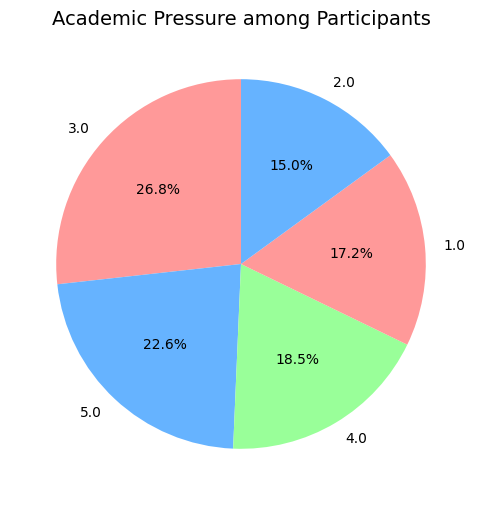

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ CSV load
df = pd.read_csv('/content/mental health survey.csv')
df.columns = df.columns.str.strip()  # Remove extra spaces

# 2️⃣ Count frequency of each category
counts = df['Academic Pressure'].value_counts()

# 3️⃣ Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',      # Show percentages
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99']  # Optional colors for clarity
)
plt.title('Academic Pressure among Participants', fontsize=14)
plt.show()


This pie chart represent the distribution of participants based on different levels of academic pressure.
The pressure levels are shown in numerical form such as 1 to 5 . where,

Lower values indicate **low academic pressure**.

HIgher values indicate **high academic pressure.**

Each slice shows the percentage of participants in each pressure level.




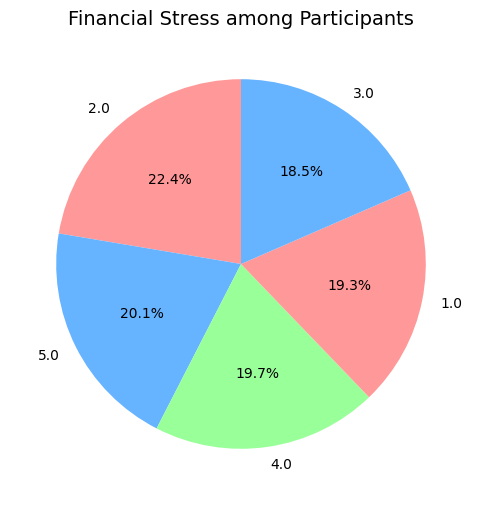

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load CSV
df = pd.read_csv('/content/mental health survey.csv')
df.columns = df.columns.str.strip()  # Remove extra spaces

# 2️⃣ Count frequency of each category
counts = df['Financial Stress'].value_counts()

# 3️⃣ Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',       # Show percentage
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99']  # Optional colors
)
plt.title('Financial Stress among Participants', fontsize=14)
plt.show()


This pie chart represents the percentage distribution of participants based on different levels of financial stress. The stress levels are shown on a scale from 1 to 5 , where,

Lower values indicates **low financial stress**.

Higher values indicates **high financial stress.**


Financial stress is considered an important factor in mental helath studies, as it can increase the risk of mental helath problems.


**Conclusion**

In this project, we develop a deep learning- based model to predict depression using mental health survey data. The dataset included various factors such as sleep duration, academic pressure, financial stress, dietary habits, work or study hours, family history of mental illness and suicidal thoughts.

The data was firstly cleaned and preprocessed to handle missing values and ensure consistency. Exploratory Data Analysis was performed using bar charts and pie charts to undertsand the patterns and relationships between different mental helath factors.

A deep learing model was then trained to classify individuals as **Depressed (1)** and **Not Depressed (0)**. The model successfully learned patterns from the data and was able to make predictions based on multiple psychological and lifestyle fctors.

The results show that factors like high academic pressure,financial stress, poor sleep and unhealthy lifestyle habits play an important role in depression prediction. This project demonstrates that deep learning can be an effective tool for ealry detection of depression which can help in timelt intervension and mental health support.

**Streamlit Application**

https://mini-project-5-mental-health-survey-f3zj9nvywx8ewdnck7qqd2.streamlit.app/